In [38]:
from PIL import Image
# Some standard imports
import onnxruntime
import numpy as np
from matplotlib import pyplot as plt

In [51]:
# helper function for data visualization
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

def scale(x, input_space="RGB", input_range=[0,1]):
    "from https://github.com/qubvel/segmentation_models.pytorch.git"
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    if input_space == "BGR":
        x = x[..., ::-1].copy()

    if input_range is not None:
        if x.max() > 1 and input_range[1] == 1:
            x = x / 255.0

    if mean is not None:
        mean = np.array(mean)
        x = x - mean

    if std is not None:
        std = np.array(std)
        x = x / std 
    return x            
def to_numpy(tensor):
    "from pytorch.org"
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

In [93]:
# visual performance of model
IMG_PATH = 'data/input/demo_1.png'
image = np.array(Image.open(IMG_PATH).convert(mode='RGB')).astype('uint8')
image_processed = scale(image).transpose(2,0,1).astype('float32')

DEVICE = 'cpu'
x_tensor = torch.from_numpy(image_processed).to(DEVICE).unsqueeze(0)

In [94]:
# compute ONNX Runtime output prediction
ort_session = onnxruntime.InferenceSession("model/geofpn.onnx")
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(x_tensor)}
ort_outs = ort_session.run(None, ort_inputs)

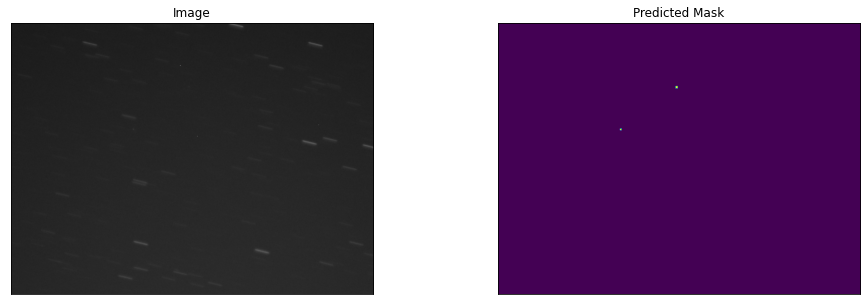

In [95]:
visualize(
    image=image, 
    predicted_mask=ort_outs[0][0,0,:,:]
)